# 02.04 - PANDAS

In [18]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## `pandas` is mostly about manipulating tables of data

see this cheat sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf


## Pandas main object is a `DataFrame`

- can read .csv, .excel, etc.


**DataFrame** es una tabla de base de datos que está en memoria

!head muestra las primeras 10 lineas de un archivo

In [20]:
!head local/data/internet_facebook.dat

# Pais,Uso_Internet,Uso_Facebook
Argentina,49.40,30.53
Australia,80.60,46.01
Belgium,67.30,36.98
Brazil,37.76,4.39
Canada,72.30,52.08
Chile,50.90,46.14
China,22.40,0.05
Colombia,38.80,25.90
Egypt,12.90,5.68


In [21]:
!wc local/data/weather_data_austin_2010.csv

  8760  17519 254046 local/data/weather_data_austin_2010.csv


Guia para el comando

In [22]:
pd.read_csv?

In [23]:
df = pd.read_csv('local/data/internet_facebook.dat', index_col='# Pais') # index_col es la columna que se va a usar como indice
df

,Uso_Internet,Uso_Facebook
# Pais,,
Argentina,49.40,30.53
Australia,80.60,46.01
Belgium,67.30,36.98
Brazil,37.76,4.39
Canada,72.30,52.08
Chile,50.90,46.14
China,22.40,0.05
Colombia,38.80,25.90
Egypt,12.90,5.68


Para ver el inicio del archivo (las primeras filas)

In [24]:
df.head()

,Uso_Internet,Uso_Facebook
# Pais,,
Argentina,49.40,30.53
Australia,80.60,46.01
Belgium,67.30,36.98
Brazil,37.76,4.39
Canada,72.30,52.08


Para ver el final del archivo (las últimas filas)

In [25]:
df.tail()

,Uso_Internet,Uso_Facebook
# Pais,,
Thailand,20.50,10.29
Turkey,35.00,31.91
USA,77.33,46.98
UK,70.18,45.97
Venezuela,25.50,28.64


Columnas

In [26]:
df.columns

Index(['Uso_Internet', 'Uso_Facebook'], dtype='object')

Indices

In [27]:
df.index

Index(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'China', 'Colombia', 'Egypt', 'France', 'Germany', 'Hong_Kong', 'India',
       'Indonesia', 'Italy', 'Japan', 'Malaysia', 'Mexico', 'Netherlands',
       'Peru', 'Philippines', 'Poland', 'Russia', 'Saudi_Arabia',
       'South_Africa', 'Spain', 'Sweden', 'Taiwan', 'Thailand', 'Turkey',
       'USA', 'UK', 'Venezuela'],
      dtype='object', name='# Pais')

**fix the index name**

In [28]:
df.index.name="Pais"
df.head()

,Uso_Internet,Uso_Facebook
Pais,,
Argentina,49.40,30.53
Australia,80.60,46.01
Belgium,67.30,36.98
Brazil,37.76,4.39
Canada,72.30,52.08


Información de las columnas numericas

In [29]:
df.describe()

,Uso_Internet,Uso_Facebook
count,33.000000,33.000000
mean,46.890000,24.668182
std,24.456421,16.511662
min,7.100000,0.050000
25%,24.900000,11.650000
50%,49.400000,25.900000
75%,67.300000,37.770000
max,82.900000,52.330000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Argentina to Venezuela
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Uso_Internet  33 non-null     float64
 1   Uso_Facebook  33 non-null     float64
dtypes: float64(2)
memory usage: 792.0+ bytes


**a dataframe is made of `Series`**. Observe that each series has **its own type**

Cada serie representa una fila

In [31]:
s1 = df["Uso_Internet"]
type(s1)

pandas.core.series.Series

In [32]:
s1

Pais
Argentina       49.40
Australia       80.60
Belgium         67.30
Brazil          37.76
Canada          72.30
Chile           50.90
China           22.40
Colombia        38.80
Egypt           12.90
France          65.70
Germany         67.00
Hong_Kong       69.50
India            7.10
Indonesia       10.50
Italy           48.80
Japan           73.80
Malaysia        62.80
Mexico          24.90
Netherlands     82.90
Peru            26.20
Philippines     21.50
Poland          52.00
Russia          27.00
Saudi_Arabia    22.70
South_Africa    10.50
Spain           66.80
Sweden          80.70
Taiwan          66.10
Thailand        20.50
Turkey          35.00
USA             77.33
UK              70.18
Venezuela       25.50
Name: Uso_Internet, dtype: float64

if the column name is not too fancy (empy spaces, accents, etc.) we can use columns names as python syntax.

In [33]:
df.Uso_Facebook

Pais
Argentina       30.53
Australia       46.01
Belgium         36.98
Brazil           4.39
Canada          52.08
Chile           46.14
China            0.05
Colombia        25.90
Egypt            5.68
France          32.91
Germany         14.07
Hong_Kong       52.33
India            1.52
Indonesia       13.49
Italy           30.62
Japan            2.00
Malaysia        37.77
Mexico          16.80
Netherlands     20.54
Peru            13.34
Philippines     19.68
Poland          11.79
Russia           2.99
Saudi_Arabia    11.65
South_Africa     7.83
Spain           30.24
Sweden          44.72
Taiwan          38.21
Thailand        10.29
Turkey          31.91
USA             46.98
UK              45.97
Venezuela       28.64
Name: Uso_Facebook, dtype: float64

## DataFrame indexing

is **NOT** exactly like numpy

- first index
    - if string refers to columns
    - if `Series` of booleans is used as a filter
    
- for selecting columns:
    - use `.loc` to select by Index
    - use `.iloc` to select by position   

In [34]:
#df["Colombia"] #Asume que es una columna

Para acceder a filas

In [35]:
df.loc["Colombia"]

Uso_Internet    38.8
Uso_Facebook    25.9
Name: Colombia, dtype: float64

Index semantics is exact!!

In [36]:
df.loc["Colombia":"Spain"] #Datos entre Colombia y España

,Uso_Internet,Uso_Facebook
Pais,,
Colombia,38.8,25.90
Egypt,12.9,5.68
France,65.7,32.91
Germany,67.0,14.07
Hong_Kong,69.5,52.33
India,7.1,1.52
Indonesia,10.5,13.49
Italy,48.8,30.62
Japan,73.8,2.00


In [37]:
df.iloc[10:15]

,Uso_Internet,Uso_Facebook
Pais,,
Germany,67.0,14.07
Hong_Kong,69.5,52.33
India,7.1,1.52
Indonesia,10.5,13.49
Italy,48.8,30.62


In [38]:
df.iloc[10].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of Uso_Internet    67.00
Uso_Facebook    14.07
Name: Germany, dtype: float64>

Filtrado

In [39]:
df[df.Uso_Internet>80]

,Uso_Internet,Uso_Facebook
Pais,,
Australia,80.6,46.01
Netherlands,82.9,20.54
Sweden,80.7,44.72


Condiciones combinadas

In [40]:
df[(df.Uso_Internet>50)&(df.Uso_Facebook>50)]

,Uso_Internet,Uso_Facebook
Pais,,
Canada,72.3,52.08
Hong_Kong,69.5,52.33


In [41]:
df[(df.Uso_Internet>50)|(df.Uso_Facebook>50)]

,Uso_Internet,Uso_Facebook
Pais,,
Australia,80.60,46.01
Belgium,67.30,36.98
Canada,72.30,52.08
Chile,50.90,46.14
France,65.70,32.91
Germany,67.00,14.07
Hong_Kong,69.50,52.33
Japan,73.80,2.00
Malaysia,62.80,37.77


## Managing data

    
    
observe csv structure:
- missing column name
- missing data 

In [42]:
!head local/data/comptagevelo2009.csv

Date,,Berri1,Maisonneuve_1,Maisonneuve_2,Brébeuf
01/01/2009,00:00,29,20,35,
02/01/2009,00:00,19,3,22,
03/01/2009,00:00,24,12,22,
04/01/2009,00:00,24,8,15,
05/01/2009,00:00,120,111,141,
06/01/2009,00:00,261,146,236,
07/01/2009,00:00,60,33,80,
08/01/2009,00:00,24,14,14,
09/01/2009,00:00,35,20,32,


In [43]:
d = pd.read_csv("local/data/comptagevelo2009.csv")
d

,Date,Unnamed: 1,Berri1,Maisonneuve_1,Maisonneuve_2,Brébeuf
0,01/01/2009,00:00,29,20,35,NaN
1,02/01/2009,00:00,19,3,22,NaN
2,03/01/2009,00:00,24,12,22,NaN
3,04/01/2009,00:00,24,8,15,NaN
4,05/01/2009,00:00,120,111,141,NaN
...,...,...,...,...,...,...
360,27/12/2009,00:00,66,29,52,0.0
361,28/12/2009,00:00,61,41,99,0.0
362,29/12/2009,00:00,89,52,115,0.0
363,30/12/2009,00:00,76,43,115,0.0


In [44]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Unnamed: 1     365 non-null    object 
 2   Berri1         365 non-null    int64  
 3   Maisonneuve_1  365 non-null    int64  
 4   Maisonneuve_2  365 non-null    int64  
 5   Brébeuf        178 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 17.2+ KB


In [45]:
d.columns, d.shape


(Index(['Date', 'Unnamed: 1', 'Berri1', 'Maisonneuve_1', 'Maisonneuve_2',
        'Brébeuf'],
       dtype='object'), (365, 6))

numerical features

In [46]:
d.describe()

,Berri1,Maisonneuve_1,Maisonneuve_2,Brébeuf
count,365.000000,365.000000,365.000000,178.000000
mean,2032.200000,1060.252055,2093.169863,2576.359551
std,1878.879799,1079.533086,1854.368523,2484.004743
min,0.000000,0.000000,0.000000,0.000000
25%,194.000000,90.000000,228.000000,0.000000
50%,1726.000000,678.000000,1686.000000,1443.500000
75%,3540.000000,1882.000000,3520.000000,4638.000000
max,6626.000000,4242.000000,6587.000000,7575.000000


In [47]:
d["Berri1"].head()

0     29
1     19
2     24
3     24
4    120
Name: Berri1, dtype: int64

In [48]:
d["Unnamed: 1"].unique() #Encuentra valores unicos

array(['00:00'], dtype=object)

In [49]:
#Lo mismo en np seria
a= np.r_[[10,2,10,3,15,4,2]]
np.unique(a)

array([ 2,  3,  4, 10, 15])

<AxesSubplot:>

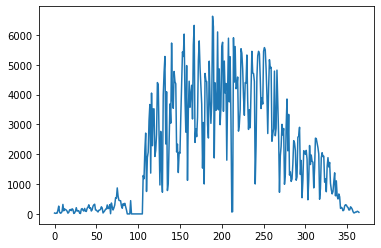

In [50]:
d["Berri1"].plot()

In [51]:
d["Berri1"].unique()


array([  29,   19,   24,  120,  261,   60,   35,   81,  318,  105,  168,
        145,  131,   93,   25,   52,  136,  147,  109,  172,  148,   15,
        209,   92,  110,   14,  158,  179,  122,   95,  185,   82,  190,
        228,  306,  188,   98,  139,  258,  304,  326,  134,  125,   96,
         65,  123,  129,  154,  239,  198,   32,   67,  157,  164,  300,
        176,  195,  310,    7,  366,  234,  132,  203,  298,  541,  525,
        871,  592,  455,  446,  441,  266,  189,  343,  292,  355,  245,
          0,  445, 1286, 1178, 2131, 2709,  752, 1886, 2069, 3132, 3668,
       1368, 4051, 2286, 3519, 3520, 1925, 2125, 2662, 4403, 4338, 2757,
        970, 2767, 1493,  728, 3982, 4742, 5278, 2344, 4094,  784, 1048,
       2442, 3686, 3042, 5728, 3815, 3540, 4775, 4434, 4363, 2075, 2338,
       1387, 2063, 2031, 3274, 4325, 5430, 6028, 3876, 2742, 4973, 1125,
       3460, 4449, 3576, 4027, 4313, 3182, 5668, 6320, 2397, 2857, 2590,
       3234, 5138, 5799, 4911, 4333, 3680, 1536, 30

In [52]:
d["Berri1"].dtype, d["Date"].dtype, d["Unnamed: 1"].dtype


(dtype('int64'), dtype('O'), dtype('O'))

In [53]:
d.index


RangeIndex(start=0, stop=365, step=1)

## Fixing data

observe we set one column as the index one, and we **convert** it to date object type

In [54]:
d.Date #Tambien se puede acceder como  d["Date"]

0      01/01/2009
1      02/01/2009
2      03/01/2009
3      04/01/2009
4      05/01/2009
          ...    
360    27/12/2009
361    28/12/2009
362    29/12/2009
363    30/12/2009
364    31/12/2009
Name: Date, Length: 365, dtype: object

In [55]:
k = pd.to_datetime(d.Date).iloc[1]
k

Timestamp('2009-02-01 00:00:00')

In [56]:
k.day_name() #Dia de la semana

'Sunday'

In [57]:
k.day #Dia del mes

1

In [58]:
k.month

2

In [59]:
k + pd.Timedelta("1h") #Añade una hora

Timestamp('2009-02-01 01:00:00')

In [60]:
d.index = pd.to_datetime(d.Date) #Convertir de cadena a fecha y convertirlo en indice
del(d["Date"])
del(d["Unnamed: 1"])
d.head()

,Berri1,Maisonneuve_1,Maisonneuve_2,Brébeuf
Date,,,,
2009-01-01,29,20,35,NaN
2009-02-01,19,3,22,NaN
2009-03-01,24,12,22,NaN
2009-04-01,24,8,15,NaN
2009-05-01,120,111,141,NaN


In [61]:
d.index

DatetimeIndex(['2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01',
               ...
               '2009-12-22', '2009-12-23', '2009-12-24', '2009-12-25',
               '2009-12-26', '2009-12-27', '2009-12-28', '2009-12-29',
               '2009-12-30', '2009-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [62]:
d.loc["2009-02":"2009-03"]

,Berri1,Maisonneuve_1,Maisonneuve_2,Brébeuf
Date,,,,
2009-02-01,19,3,22,NaN
2009-03-01,24,12,22,NaN
2009-02-02,158,98,174,NaN
2009-03-02,179,82,149,NaN
2009-02-13,209,127,222,NaN
2009-02-14,98,56,85,NaN
2009-02-15,139,77,101,NaN
2009-02-16,258,155,291,NaN
2009-02-17,304,133,348,NaN


let's fix columns names

In [63]:
d.columns=["Berri", "Mneuve1", "Mneuve2", "Brebeuf"]
d.head()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,29,20,35,NaN
2009-02-01,19,3,22,NaN
2009-03-01,24,12,22,NaN
2009-04-01,24,8,15,NaN
2009-05-01,120,111,141,NaN


In [64]:
for col in d.columns:
    print (col, np.sum(pd.isnull(d[col])))

Berri 0
Mneuve1 0
Mneuve2 0
Brebeuf 187


In [65]:
d.shape

(365, 4)

In [66]:
d['Brebeuf'].describe()

count     178.000000
mean     2576.359551
std      2484.004743
min         0.000000
25%         0.000000
50%      1443.500000
75%      4638.000000
max      7575.000000
Name: Brebeuf, dtype: float64

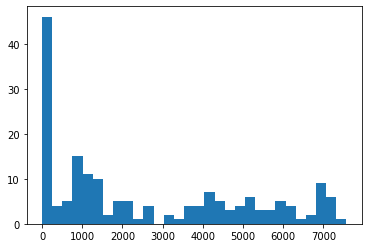

In [67]:
plt.hist(d.Brebeuf, bins=30);

<AxesSubplot:xlabel='Date'>

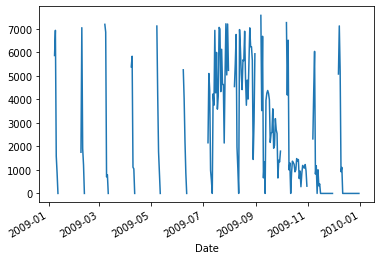

In [68]:
d.Brebeuf.plot()

**fix missing**!!!

In [69]:
d.Brebeuf.fillna(d.Brebeuf.mean(), inplace=True) #Llene los NaN con el promedio de la columna
#inplace es para editar el df en memoria (el original)

In [70]:
d['Brebeuf'].describe()

count     365.000000
mean     2576.359551
std      1732.161423
min         0.000000
25%      1588.000000
50%      2576.359551
75%      2576.359551
max      7575.000000
Name: Brebeuf, dtype: float64

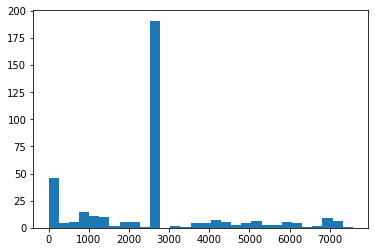

In [71]:
plt.hist(d.Brebeuf, bins=30);

In [72]:
d

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,29,20,35,2576.359551
2009-02-01,19,3,22,2576.359551
2009-03-01,24,12,22,2576.359551
2009-04-01,24,8,15,2576.359551
2009-05-01,120,111,141,2576.359551
...,...,...,...,...
2009-12-27,66,29,52,0.000000
2009-12-28,61,41,99,0.000000
2009-12-29,89,52,115,0.000000


let's make sure it is sorted

In [73]:
d.sort_index(inplace=True) #Ordenado por indice
d.head()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,29,20,35,2576.359551
2009-01-02,14,2,2,2576.359551
2009-01-03,67,30,80,2576.359551
2009-01-04,0,0,0,2576.359551
2009-01-05,1925,1256,1501,2576.359551


## Filtering

In [74]:
d[d.Berri>6000]


,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-05-06,6028,4120,4223,2576.359551
2009-06-17,6320,3388,6047,2576.359551
2009-07-15,6100,3767,5536,6939.000000
2009-09-07,6626,4227,5751,7575.000000
2009-10-07,6274,4242,5435,7268.000000


In [75]:
d[(d.Berri>6000) & (d.Brebeuf<7000)]


,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-05-06,6028,4120,4223,2576.359551
2009-06-17,6320,3388,6047,2576.359551
2009-07-15,6100,3767,5536,6939.000000


## Locating

In [76]:
d[d.Berri>5500].sort_index(axis=0)


,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-03-08,5904,3102,4853,7194.000000
2009-05-06,6028,4120,4223,2576.359551
2009-05-08,5611,2646,5201,7121.000000
2009-05-21,5728,3693,5397,2576.359551
2009-06-16,5668,3499,5609,2576.359551
2009-06-17,6320,3388,6047,2576.359551
2009-06-23,5799,3114,5386,2576.359551
2009-07-15,6100,3767,5536,6939.000000
2009-07-20,5607,3825,5092,7064.000000


In [77]:
d.iloc[100:110]


,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-04-11,1974,1113,2693,1046.000000
2009-04-12,1108,595,1472,0.000000
2009-04-13,0,0,0,2576.359551
2009-04-14,0,0,0,2576.359551
2009-04-15,0,0,0,2576.359551
2009-04-16,0,0,0,2576.359551
2009-04-17,1286,820,1436,2576.359551
2009-04-18,1178,667,826,2576.359551
2009-04-19,2131,1155,1426,2576.359551


**dates as INDEX have special semantics**

In [78]:
d.loc["2009-10-01":"2009-10-10"]


,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-10-01,81,45,79,2576.359551
2009-10-02,228,101,260,2576.359551
2009-10-03,366,203,354,2576.359551
2009-10-04,0,0,0,2576.359551
2009-10-05,728,362,523,2576.359551
2009-10-06,3460,2354,3978,2576.359551
2009-10-07,6274,4242,5435,7268.000000
2009-10-08,2999,1545,3185,4187.000000
2009-10-09,5496,2921,6587,6520.000000


can do sorting across any criteria

In [79]:
d.sort_values(by="Berri").head()
#Esto crea un df nuevo

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-07-04,0,0,0,2576.359551
2009-03-30,0,0,0,2576.359551
2009-04-04,0,0,0,2576.359551
2009-04-13,0,0,0,2576.359551
2009-04-14,0,0,0,2576.359551


and chain operations

In [80]:
d.sort_values(by="Berri").loc["2009-10-01":"2009-10-10"]
#Ordenado por Berri en un rango de fechas

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-10-04,0,0,0,2576.359551
2009-10-01,81,45,79,2576.359551
2009-10-02,228,101,260,2576.359551
2009-10-03,366,203,354,2576.359551
2009-10-05,728,362,523,2576.359551
2009-10-10,1407,725,1443,1003.000000
2009-10-08,2999,1545,3185,4187.000000
2009-10-06,3460,2354,3978,2576.359551
2009-10-09,5496,2921,6587,6520.000000


## Time series operations

In [81]:
d.head(10)

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,29,20,35,2576.359551
2009-01-02,14,2,2,2576.359551
2009-01-03,67,30,80,2576.359551
2009-01-04,0,0,0,2576.359551
2009-01-05,1925,1256,1501,2576.359551
2009-01-06,3274,2093,2726,2576.359551
2009-01-07,4471,2239,3051,2576.359551
2009-01-08,63,1053,3351,5869.000000
2009-01-09,5298,2796,5765,6939.000000


Ventana deslizante de 3 filas, por eso el primero y el segundo no tienen valores, porque no tienen 3 valores antes para sacar el promedio.

***Ejemplo:*** 
El Berri 2009-01-03 (36.666667) es el promedio de 29, 14 y 67

In [82]:
d.rolling(3).mean().head(10)

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,NaN,NaN,NaN,NaN
2009-01-02,NaN,NaN,NaN,NaN
2009-01-03,36.666667,17.333333,39.000000,2576.359551
2009-01-04,27.000000,10.666667,27.333333,2576.359551
2009-01-05,664.000000,428.666667,527.000000,2576.359551
2009-01-06,1733.000000,1116.333333,1409.000000,2576.359551
2009-01-07,3223.333333,1862.666667,2426.000000,2576.359551
2009-01-08,2602.666667,1795.000000,3042.666667,3673.906367
2009-01-09,3277.333333,2029.333333,4055.666667,5128.119850


In [83]:
d.rolling(3).max()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,NaN,NaN,NaN,NaN
2009-01-02,NaN,NaN,NaN,NaN
2009-01-03,67.0,30.0,80.0,2576.359551
2009-01-04,67.0,30.0,80.0,2576.359551
2009-01-05,1925.0,1256.0,1501.0,2576.359551
...,...,...,...,...
2009-12-27,66.0,29.0,59.0,0.000000
2009-12-28,66.0,41.0,99.0,0.000000
2009-12-29,89.0,52.0,115.0,0.000000


In [84]:
d.rolling(3).std() #Desviacion estandar

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,NaN,NaN,NaN,NaN
2009-01-02,NaN,NaN,NaN,NaN
2009-01-03,27.319102,14.189198,39.153544,0.0
2009-01-04,35.341194,16.772994,45.621632,0.0
2009-01-05,1092.571737,716.648682,844.456630,0.0
...,...,...,...,...
2009-12-27,17.009801,4.618802,11.789826,0.0
2009-12-28,13.796135,10.066446,25.357445,0.0
2009-12-29,14.933185,11.503623,32.746501,0.0


agg hacer una función para agregar valores

In [85]:
k = d.rolling(3)
k.agg?

In [86]:
d.index = d.index + pd.Timedelta("5m")
d.head()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01 00:05:00,29,20,35,2576.359551
2009-01-02 00:05:00,14,2,2,2576.359551
2009-01-03 00:05:00,67,30,80,2576.359551
2009-01-04 00:05:00,0,0,0,2576.359551
2009-01-05 00:05:00,1925,1256,1501,2576.359551


In [87]:
d.shift(freq=pd.Timedelta(days=365)).head()
# shift desplaza el indice 365 dias

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2010-01-01 00:05:00,29,20,35,2576.359551
2010-01-02 00:05:00,14,2,2,2576.359551
2010-01-03 00:05:00,67,30,80,2576.359551
2010-01-04 00:05:00,0,0,0,2576.359551
2010-01-05 00:05:00,1925,1256,1501,2576.359551


## Downsampling

Resolución mayor de nuestra serie temporal

***Ejemplo*** 

Hay valores cada día, y se agrupan cada tres días

In [88]:
d.resample(pd.Timedelta("3d")).max().head()


,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,67,30,80,2576.359551
2009-01-04,3274,2093,2726,2576.359551
2009-01-07,5298,2796,5765,6939.000000
2009-01-10,2643,599,3528,1588.000000
2009-01-13,168,94,175,2576.359551


In [89]:
d.resample(pd.Timedelta("2d")).mean().head()


,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,21.5,11.0,18.5,2576.359551
2009-01-03,33.5,15.0,40.0,2576.359551
2009-01-05,2599.5,1674.5,2113.5,2576.359551
2009-01-07,2267.0,1646.0,3201.0,4222.679775
2009-01-09,3970.5,1409.0,4646.5,4263.500000


## Upsampling

Resolución menor de nuestra serie temporal

***Ejemplo***

Hay valores cada día, y se quieren cada 12 horas

In [90]:
d.head(10)

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01 00:05:00,29,20,35,2576.359551
2009-01-02 00:05:00,14,2,2,2576.359551
2009-01-03 00:05:00,67,30,80,2576.359551
2009-01-04 00:05:00,0,0,0,2576.359551
2009-01-05 00:05:00,1925,1256,1501,2576.359551
2009-01-06 00:05:00,3274,2093,2726,2576.359551
2009-01-07 00:05:00,4471,2239,3051,2576.359551
2009-01-08 00:05:00,63,1053,3351,5869.000000
2009-01-09 00:05:00,5298,2796,5765,6939.000000


In [91]:
d.resample(pd.Timedelta("12h")).first().head()


,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01 00:00:00,29.0,20.0,35.0,2576.359551
2009-01-01 12:00:00,NaN,NaN,NaN,NaN
2009-01-02 00:00:00,14.0,2.0,2.0,2576.359551
2009-01-02 12:00:00,NaN,NaN,NaN,NaN
2009-01-03 00:00:00,67.0,30.0,80.0,2576.359551


In [92]:
d.resample(pd.Timedelta("12h")).first().fillna(method="pad").head()
# method es el metodo para rellenar los vacios
# pad rellenar los NaN con el valor anterior

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01 00:00:00,29.0,20.0,35.0,2576.359551
2009-01-01 12:00:00,29.0,20.0,35.0,2576.359551
2009-01-02 00:00:00,14.0,2.0,2.0,2576.359551
2009-01-02 12:00:00,14.0,2.0,2.0,2576.359551
2009-01-03 00:00:00,67.0,30.0,80.0,2576.359551


## Building Dataframes from other structures

In [93]:
a = np.random.randint(10,size=(20,5))
a

array([[0, 1, 5, 3, 3],
       [8, 2, 2, 0, 2],
       [1, 8, 0, 3, 4],
       [6, 6, 1, 2, 2],
       [1, 3, 8, 9, 5],
       [2, 9, 0, 9, 9],
       [4, 6, 6, 4, 9],
       [1, 4, 9, 0, 0],
       [3, 1, 3, 1, 6],
       [9, 4, 1, 2, 2],
       [4, 0, 5, 0, 0],
       [4, 1, 2, 9, 8],
       [5, 3, 1, 3, 4],
       [9, 6, 3, 0, 8],
       [3, 3, 0, 3, 2],
       [5, 9, 9, 1, 7],
       [0, 5, 7, 6, 2],
       [8, 6, 6, 9, 3],
       [0, 3, 9, 2, 4],
       [4, 8, 1, 2, 6]])

In [94]:
k = pd.DataFrame(a, columns=["uno", "dos", "tres", "cuatro", "cinco"], index=range(10,10+len(a)))
k

,uno,dos,tres,cuatro,cinco
10,0,1,5,3,3
11,8,2,2,0,2
12,1,8,0,3,4
13,6,6,1,2,2
14,1,3,8,9,5
15,2,9,0,9,9
16,4,6,6,4,9
17,1,4,9,0,0
18,3,1,3,1,6
19,9,4,1,2,2


## `.values` access the underlying `numpy` structure

In [95]:
d.values #Accede al array de np

array([[2.90000000e+01, 2.00000000e+01, 3.50000000e+01, 2.57635955e+03],
       [1.40000000e+01, 2.00000000e+00, 2.00000000e+00, 2.57635955e+03],
       [6.70000000e+01, 3.00000000e+01, 8.00000000e+01, 2.57635955e+03],
       ...,
       [8.90000000e+01, 5.20000000e+01, 1.15000000e+02, 0.00000000e+00],
       [7.60000000e+01, 4.30000000e+01, 1.15000000e+02, 0.00000000e+00],
       [5.30000000e+01, 4.60000000e+01, 1.12000000e+02, 0.00000000e+00]])

## some out-of-the-box plotting

but recall that we always can do custom plotting

<AxesSubplot:xlabel='Date'>

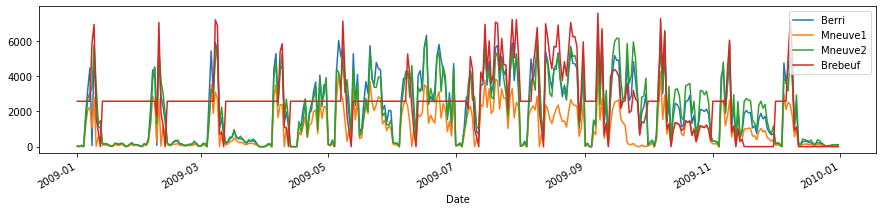

In [96]:
d.plot(figsize=(15,3))


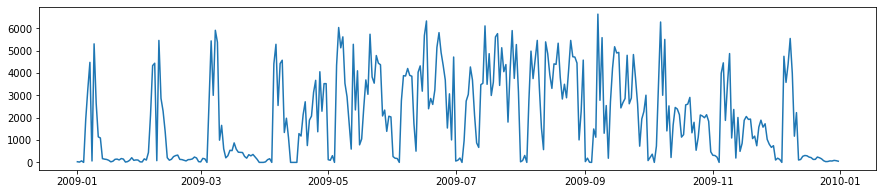

In [97]:
plt.figure(figsize=(15,3))
plt.plot(d.Berri)

<AxesSubplot:xlabel='Date'>

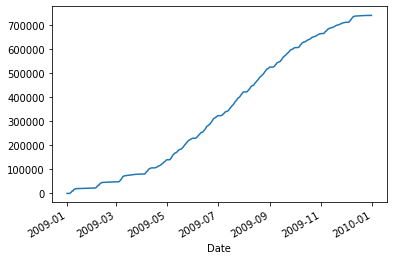

In [98]:
d.Berri.cumsum().plot()
#cumsum acumulados

Text(0, 0.5, 'Brebeuf')

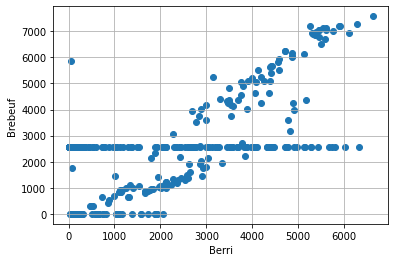

In [99]:
plt.scatter(d.Berri, d.Brebeuf)
plt.grid()
plt.xlabel("Berri")
plt.ylabel("Brebeuf")

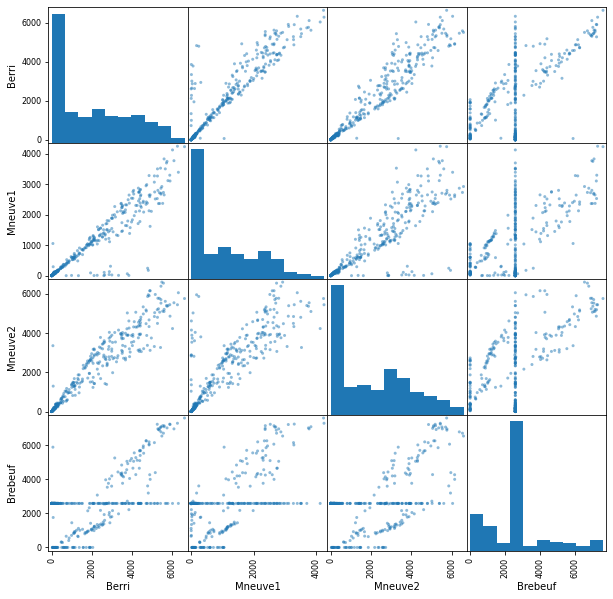

In [100]:
pd.plotting.scatter_matrix(d, figsize=(10,10));

## Grouping

In [101]:
#Agrupar por meses
d["month"] = [i.month for i in d.index]
d.head()

,Berri,Mneuve1,Mneuve2,Brebeuf,month
Date,,,,,
2009-01-01 00:05:00,29,20,35,2576.359551,1
2009-01-02 00:05:00,14,2,2,2576.359551,1
2009-01-03 00:05:00,67,30,80,2576.359551,1
2009-01-04 00:05:00,0,0,0,2576.359551,1
2009-01-05 00:05:00,1925,1256,1501,2576.359551,1


In [102]:
d.groupby("month").max()

,Berri,Mneuve1,Mneuve2,Brebeuf
month,,,,
1,5298,2796,5765,6939.0
2,5451,2868,5517,7052.0
3,5904,3523,5762,7194.0
4,5278,3499,5327,5837.0
5,6028,4120,5397,7121.0
6,6320,3499,6047,5259.0
7,6100,3825,5536,7219.0
8,5452,2865,6379,7044.0
9,6626,4227,6535,7575.0


In [103]:
d.groupby("month").count()

,Berri,Mneuve1,Mneuve2,Brebeuf
month,,,,
1,31,31,31,31
2,28,28,28,28
3,31,31,31,31
4,30,30,30,30
5,31,31,31,31
6,30,30,30,30
7,31,31,31,31
8,31,31,31,31
9,30,30,30,30


## Time series

observe we can **establish at load time** many thing if the dataset is relatively clean

In [104]:
tiempo=pd.read_csv('local/data/weather_data_austin_2010.csv',parse_dates=['Date'], dayfirst=True ,index_col='Date')
tiempo

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0
...,...,...,...
2010-12-31 19:00:00,51.1,38.1,1.0
2010-12-31 20:00:00,49.0,37.9,1.0
2010-12-31 21:00:00,47.9,37.9,1.0


In [105]:
tiempo.loc['2010-08-01':'2010-10-30']


,Temperature,DewPoint,Pressure
Date,,,
2010-08-01 00:00:00,79.0,70.8,1.0
2010-08-01 01:00:00,77.4,71.2,1.0
2010-08-01 02:00:00,76.4,71.3,1.0
2010-08-01 03:00:00,75.7,71.4,1.0
2010-08-01 04:00:00,75.1,71.4,1.0
...,...,...,...
2010-10-30 19:00:00,65.4,53.6,1.0
2010-10-30 20:00:00,63.6,53.9,1.0
2010-10-30 21:00:00,62.2,53.8,1.0


In [106]:
tiempo.loc['2010-06'].head()


,Temperature,DewPoint,Pressure
Date,,,
2010-06-01 00:00:00,74.0,67.9,1.0
2010-06-01 01:00:00,72.6,68.0,1.0
2010-06-01 02:00:00,72.0,67.9,1.0
2010-06-01 03:00:00,71.6,67.9,1.0
2010-06-01 04:00:00,71.1,67.7,1.0


In [107]:
tiempo.sample(10) #Muestra aleatoria

,Temperature,DewPoint,Pressure
Date,,,
2010-11-04 23:00:00,59.5,53.0,1.0
2010-03-25 20:00:00,63.7,50.6,1.0
2010-01-03 04:00:00,44.1,37.7,1.0
2010-10-20 10:00:00,70.7,58.1,1.0
2010-10-03 09:00:00,72.3,61.8,1.0
2010-07-29 20:00:00,85.8,68.6,1.0
2010-05-15 10:00:00,76.8,64.7,1.0
2010-04-30 03:00:00,64.9,60.3,1.0
2010-12-01 12:00:00,61.9,43.9,1.0


In [108]:
tiempo.sample(frac=0.01) #frac es la fracción de elementos del eje a devolver. 

,Temperature,DewPoint,Pressure
Date,,,
2010-12-04 14:00:00,64.0,42.6,1.0
2010-03-12 04:00:00,53.6,47.4,1.0
2010-10-27 08:00:00,60.8,55.1,1.0
2010-11-03 19:00:00,64.5,53.1,1.0
2010-06-18 19:00:00,86.7,68.3,1.0
...,...,...,...
2010-06-21 22:00:00,79.4,69.7,1.0
2010-11-13 17:00:00,69.2,49.5,1.0
2010-11-01 06:00:00,56.7,52.1,1.0


## Resampling

In [109]:
tiempo.head()


,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [110]:
tiempo.resample("5d").mean().head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01,49.720833,38.092500,1.0
2010-01-06,49.449167,37.575000,1.0
2010-01-11,49.222500,37.603333,1.0
2010-01-16,49.441667,37.650000,1.0
2010-01-21,50.683333,39.309167,1.0


In [111]:
tiempo.resample("30min").mean()[:15]


,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 00:30:00,NaN,NaN,NaN
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 01:30:00,NaN,NaN,NaN
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 02:30:00,NaN,NaN,NaN
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 03:30:00,NaN,NaN,NaN
2010-01-01 04:00:00,43.5,36.8,1.0


In [112]:

subt=tiempo.between_time(start_time='1:00',end_time='12:00')
subt

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0
2010-01-01 05:00:00,43.0,36.5,1.0
...,...,...,...
2010-12-31 08:00:00,42.5,36.1,1.0
2010-12-31 09:00:00,46.0,37.7,1.0
2010-12-31 10:00:00,49.4,38.0,1.0


In [113]:
tiempo.index.weekday


Int64Index([4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='Date', length=8759)

In [114]:
tiempo.index.month


Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=8759)

In [115]:
tiempo.index.day


Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            31, 31, 31, 31, 31, 31, 31, 31, 31, 31],
           dtype='int64', name='Date', length=8759)

<AxesSubplot:xlabel='Date'>

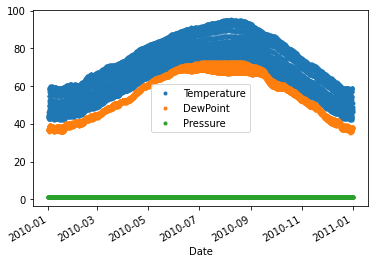

In [116]:
tiempo.plot(style='.')


<ipython-input-117-0d9498cb50e6>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tiempo['2010-01'].plot()


<AxesSubplot:xlabel='Date'>

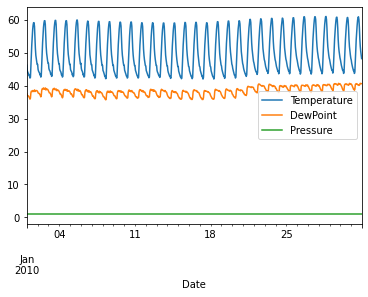

In [117]:
tiempo['2010-01'].plot()

<ipython-input-118-a10ddd274c36>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tiempo['2010-01-04'].plot()


<AxesSubplot:xlabel='Date'>

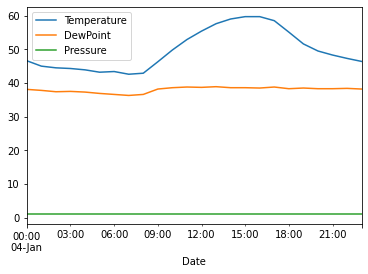

In [118]:
tiempo['2010-01-04'].plot()

## Rolling operations

In [119]:
import pandas as pd
### permite obtener data frames directamente de internet
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 111.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 1.9 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting u

In [120]:
import yfinance as yf


In [121]:
#define the ticker symbol
tickerSymbol = 'MSFT'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
gs = tickerData.history(period='1d', start='2010-1-1', end='2020-1-25')

#see your data
gs

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,23.372015,23.738395,23.349116,23.623901,38409100,0.0,0.0
2010-01-05 00:00:00-05:00,23.547570,23.738393,23.387277,23.631531,49749600,0.0,0.0
2010-01-06 00:00:00-05:00,23.570474,23.723133,23.295690,23.486513,58182400,0.0,0.0
2010-01-07 00:00:00-05:00,23.379648,23.433079,23.043800,23.242256,50559700,0.0,0.0
2010-01-08 00:00:00-05:00,23.112497,23.570472,23.081965,23.402548,51197400,0.0,0.0
...,...,...,...,...,...,...,...
2020-01-17 00:00:00-05:00,162.356120,162.404611,160.426306,162.045807,34371700,0.0,0.0
2020-01-21 00:00:00-05:00,161.638538,163.102875,161.396099,161.463989,29517200,0.0,0.0
2020-01-22 00:00:00-05:00,162.336734,162.424023,160.668757,160.688156,24138800,0.0,0.0


In [122]:
gs.Close.rolling(10).mean().dropna().head(20) 


Date
2010-01-15 00:00:00-05:00    23.379648
2010-01-19 00:00:00-05:00    23.391097
2010-01-20 00:00:00-05:00    23.362856
2010-01-21 00:00:00-05:00    23.304845
2010-01-22 00:00:00-05:00    23.191114
2010-01-25 00:00:00-05:00    23.088832
2010-01-26 00:00:00-05:00    23.030058
2010-01-27 00:00:00-05:00    22.999527
2010-01-28 00:00:00-05:00    22.908694
2010-01-29 00:00:00-05:00    22.696500
2010-02-01 00:00:00-05:00    22.509493
2010-02-02 00:00:00-05:00    22.307983
2010-02-03 00:00:00-05:00    22.158378
2010-02-04 00:00:00-05:00    21.992745
2010-02-05 00:00:00-05:00    21.920995
2010-02-08 00:00:00-05:00    21.798869
2010-02-09 00:00:00-05:00    21.685137
2010-02-10 00:00:00-05:00    21.556903
2010-02-11 00:00:00-05:00    21.477521
2010-02-12 00:00:00-05:00    21.458439
Name: Close, dtype: float64

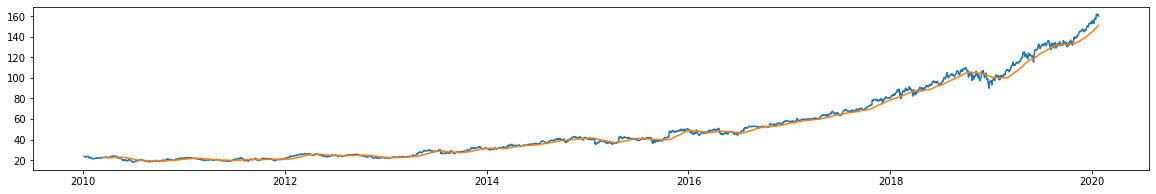

In [123]:
plt.figure(figsize=(20,3))
plt.plot(gs.Close)
plt.plot(gs.Close.rolling(50).mean())


**Caracteristica center de rolling:**

*bool, default: False*

Si es False, establece las etiquetas de la ventana como el borde derecho del índice de la ventana.

Si es True, establece las etiquetas de la ventana como el centro del índice de la ventana.

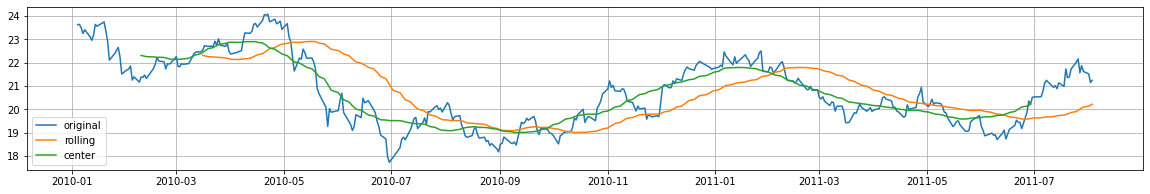

In [124]:
plt.figure(figsize=(20,3))
plt.plot(gs.iloc[:400].Close, label="original")
plt.plot(gs.iloc[:400].Close.rolling(50).mean(), label="rolling")
plt.plot(gs.iloc[:400].Close.rolling(50, center=True).mean(), label="center")
plt.legend(); #Convenciones
plt.grid();

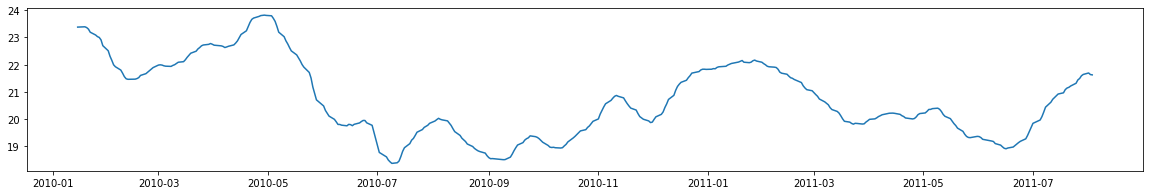

In [125]:
plt.figure(figsize=(20,3))
plt.plot(gs.iloc[:400].Close.rolling(10).mean())
